## PyTorch - Supervised Learning

The following tutorial has been experimented using PyTorch 1.13.0+cu116</br>

### Goal of this tutorial
- Introduce PyTorch, the tool for scientific computing
- Learn the basic PyTorch concepts and modules such as tensors, computational graphs, automatic differentiation, affine transformation, nonlinearity, loss function, optimizer and data loader through self-contained examples
- Learn how to train a linear regression model purely in PyTorch

###  General
- This notebook was last tested on Python 3.8.16, PyTorch 1.13.0+cu116, and Matplotlib 3.2.2

We would like to acknowledge the following materials which helped as a reference in preparing this tutorial:
- https://pytorch.org/tutorials/
- https://github.com/jcjohnson/pytorch-examples
- https://github.com/rguthrie3/DeepLearningForNLPInPytorch
- https://github.com/hunkim/PyTorchZeroToAll

## Introduction to PyTorch

PyTorch is a Python based tool for scientific computing that provides three main features:
- An n-dimensional Tensor, which is similar to numpy but can run on GPUs
- Easily build big computational graphs for deep learning
- Automatic differentiation for computing gradients for neural networks

You can install PyTorch from: https://pytorch.org/

In [2]:
import torch

## PyTorch's Tensor

Tensor is an n-dimensional array, which is a generalization of a matrix that can be indexed in more than 2 dimensions. Tensor is similar to numpy that most of the operations in numpy object can be performed on a tensor object. However, tensor object benefits from strong GPU acceleration while numpy does not. All computations in deep learning are performed on tensors. Tensors also store optional information such as gradient and bookkeeping for computational graph. 


###  Tensor Creation
Let us start by creating a tensor of size 5x3:

In [3]:
x = torch.empty(5, 3)
print(x)

tensor([[6.5437e-34, 0.0000e+00, 3.5032e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 7.1463e+22, 4.6241e+30],
        [1.0552e+24, 5.5757e-02, 1.8728e+31],
        [5.9571e-02, 7.0374e+22, 0.0000e+00]])


Note: An uninitialized matrix is declared, but does not contain definite known values before it is used. When an uninitialized matrix is created, whatever values were in the allocated memory at the time will appear as the initial values.

Construct a randomly initialized tensor of size 5x3:

In [4]:
x = torch.rand(5, 3) # a tensor filled with random numbers from a uniform distribution on the interval [0,1)
print(x) 

tensor([[0.0356, 0.6433, 0.1284],
        [0.9764, 0.8203, 0.8917],
        [0.2094, 0.9906, 0.7268],
        [0.8653, 0.5510, 0.7170],
        [0.2487, 0.8046, 0.2751]])


Construct a tensor filled zeros and of data type (dtype) long:

In [5]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construct a tensor directly from data:

In [6]:
x = torch.tensor([[5.5, 3], [3.2, 13], [6.9, 23]])
print(x)

tensor([[ 5.5000,  3.0000],
        [ 3.2000, 13.0000],
        [ 6.9000, 23.0000]])


Construct a tensor based on existing tensor: (reusing properties of input tensor like dtype by default)

In [7]:
y = torch.randn_like(x) 
print(y)

tensor([[-0.1414, -0.2609],
        [-0.0153,  0.0754],
        [-0.8452, -0.7677]])


Get the size of the tensor:

In [8]:
print(y.size())  # you can also use y.shape()
print(y.size(1)) # get the number of columns

torch.Size([3, 2])
2


Construct a 3D tensor:

In [9]:
z = torch.tensor([ [[5.5, 3], [3.2, 13], [6.9, 23]], [[2.1, 3.3], [1.8, 2], [5.2, 20]] ])
print(z)

tensor([[[ 5.5000,  3.0000],
         [ 3.2000, 13.0000],
         [ 6.9000, 23.0000]],

        [[ 2.1000,  3.3000],
         [ 1.8000,  2.0000],
         [ 5.2000, 20.0000]]])


What is a 3D tensor anyway? Think about it like this. If you have a vector, indexing into the vector gives you a scalar. If you have a matrix, indexing into the matrix gives you a vector. If you have a 3D tensor, then indexing into the tensor gives you a matrix!

The size of the 3D tensor will be 2x3x2 (in this example, 3D tensor is a collection of two 3x2 matrices). Let's print the size: 

In [10]:
print(z.size())

torch.Size([2, 3, 2])


In [11]:
print(z[1]) # accesses the second dimension (matrix) whose size will be 3x2

tensor([[ 2.1000,  3.3000],
        [ 1.8000,  2.0000],
        [ 5.2000, 20.0000]])


In [12]:
print(z[1][1]) # accesses the second dimension of the second dimension (vector) whose size will be 1x2

tensor([1.8000, 2.0000])


In [13]:
print(z[1][1][1]) # accesses the second dimension of the second dimension of the second dimension (scalar) whose size will be 1x1

tensor(2.)


In [14]:
print(z.dtype) # prints data type of tensor

torch.float32


The default data type of a tensor is Float. If you want an integer tensor, you can do:

In [15]:
it = torch.tensor([3, 4], dtype=torch.int)
print(it)

tensor([3, 4], dtype=torch.int32)


###  Operations on a Tensor

There are multiple syntaxes for operations. Let us take a look at the addition operation.

In [16]:
# let's create two tensors
x = torch.rand(5, 3)
y = torch.rand(5, 3)
# let's print those two tensors
print(x)
print(y)

tensor([[0.4934, 0.5862, 0.5979],
        [0.0148, 0.7133, 0.7830],
        [0.8831, 0.0985, 0.7440],
        [0.5358, 0.6307, 0.2089],
        [0.8214, 0.0455, 0.8896]])
tensor([[0.5271, 0.7603, 0.2419],
        [0.6530, 0.4634, 0.9621],
        [0.6832, 0.7981, 0.6588],
        [0.4347, 0.3473, 0.3429],
        [0.4213, 0.2380, 0.2524]])


In [17]:
# let's add them in two ways
print(x + y) # method 1
print(torch.add(x, y)) # method 2

tensor([[1.0205, 1.3465, 0.8399],
        [0.6678, 1.1767, 1.7451],
        [1.5663, 0.8965, 1.4028],
        [0.9705, 0.9781, 0.5518],
        [1.2427, 0.2835, 1.1420]])
tensor([[1.0205, 1.3465, 0.8399],
        [0.6678, 1.1767, 1.7451],
        [1.5663, 0.8965, 1.4028],
        [0.9705, 0.9781, 0.5518],
        [1.2427, 0.2835, 1.1420]])


In [18]:
y.add_(x) # adds x to y (in-place) y := y + x  (method 3) or alternatively we can do y = torch.add(x,y)

tensor([[1.0205, 1.3465, 0.8399],
        [0.6678, 1.1767, 1.7451],
        [1.5663, 0.8965, 1.4028],
        [0.9705, 0.9781, 0.5518],
        [1.2427, 0.2835, 1.1420]])

Any operation that mutates a tensor in-place is post-fixed with an ``_``. For example: ``x.copy_(y)``, ``x.t_()`` (transpose), will change x.

We can use standard NumPy-like indexing:

In [19]:
print(x) # prints x whose size is 5x3
print(x[:, 1]) # prints the second column of tensor whose size is 1x5

tensor([[0.4934, 0.5862, 0.5979],
        [0.0148, 0.7133, 0.7830],
        [0.8831, 0.0985, 0.7440],
        [0.5358, 0.6307, 0.2089],
        [0.8214, 0.0455, 0.8896]])
tensor([0.5862, 0.7133, 0.0985, 0.6307, 0.0455])


Let us resize/reshape tensor:

In [20]:
# let's print x's size
print(x.size()) #  5x3

torch.Size([5, 3])


In [21]:
# let's reshape x to a flat array
print(x.view(15)) # print reshaped tensor
print(x.view(15).size()) # print size of the reshaped tensor

tensor([0.4934, 0.5862, 0.5979, 0.0148, 0.7133, 0.7830, 0.8831, 0.0985, 0.7440,
        0.5358, 0.6307, 0.2089, 0.8214, 0.0455, 0.8896])
torch.Size([15])


Let us multiply two tensors:

In [22]:
# let's create two tensors
a = torch.randn(4, 1) 
b = torch.randn(1, 4)

In [23]:
# let's multiply each other: a x b 
torch.mul(a, b) # (4 x 1) x (1 x 4) = (4 x 4) 

tensor([[ 0.2188,  0.0862, -1.4903, -0.3966],
        [-0.4006, -0.1578,  2.7290,  0.7262],
        [ 0.0338,  0.0133, -0.2300, -0.0612],
        [-0.1868, -0.0736,  1.2725,  0.3386]])

Let us compute the mean of a tensor in one particular dimension:

In [24]:
# let's create a tensor
a = torch.randn(3, 5)
print(a)

tensor([[-0.7817, -2.3546, -0.6805,  1.5193,  0.4989],
        [-0.5313, -1.1652,  0.1733, -0.4363,  0.5582],
        [ 0.5935,  0.6250, -0.5302,  2.2233,  1.0357]])


In [25]:
# let's perform mean of the tensor over columns
print(torch.mean(a, 1)) # reduce over columns (1) results in 1x3

tensor([-0.3597, -0.2803,  0.7895])


In [26]:
# let's perform mean of the tensor over rows
print(torch.mean(a, 0)) # reduce over rows (0) results in 1x5

tensor([-0.2398, -0.9649, -0.3458,  1.1021,  0.6976])


Let us compute the max of a tensor in one particular dimension:

In [27]:
# let's create a tensor
a = torch.randn(4, 3)
print(a)

tensor([[-2.6513e-03, -1.9266e+00,  7.5424e-01],
        [ 1.8283e+00,  8.9437e-01, -8.1237e-01],
        [ 2.9553e+00, -2.2803e-01,  1.0035e+00],
        [-7.1546e-01, -1.0777e+00,  3.9524e-01]])


In [28]:
# let's identify maximum in each row
values, indices = torch.max(a, 1) 
print(values) # values is the maximum value of each row of the input tensor. (1x4)
print(indices) # indices is the index location of each maximum value found (argmax) (1x4)

tensor([0.7542, 1.8283, 2.9553, 0.3952])
tensor([2, 0, 0, 2])


You can take a look at the list of supported Tensor functions here: https://pytorch.org/docs/stable/tensors.html

### NumPy Bridge 
We can easily convert a Torch tensor to a numpy array and vice versa.

Let us convert a Torch Tensor to a NumPy array:

In [29]:
# let's create a tensor
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [30]:
# let's convert that tensor to numpy
b = a.numpy() # converts Tensor to NumPy with a,b pointing to same memory locations
print(b)

[1. 1. 1. 1. 1.]


In [31]:
# manipulate 'a' (changes will reflect in 'b')
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Let us convert a NumPy array to a Torch Tensor:

In [32]:
# let's create a numpy array
import numpy as np
a = np.ones(5)
print(a)

[1. 1. 1. 1. 1.]


In [33]:
# let's convert to tensor
b = torch.from_numpy(a)
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [34]:
# manipulate 'a' (changes will reflect in 'b')
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### CUDA Tensors

We can use ``.to`` function to move Tensors onto any device. Generally, we move tensors to GPUs to accelerate the computation.

In [35]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
  device = torch.device("cuda")          # a CUDA device object
  y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
  x = x.to(device)                       # or just use strings ``.to("cuda")``
  z = x + y
  print(z)
  print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

## Computational Graph and Automatic Differentiation

Computation graph is an essential concept for efficient deep learning programming, because it allows you to not explicitly write the back propagation gradients yourselves. A computation graph is simply a specification of how your data is combined to give you the output. Since the graph totally specifies what parameters were involved with which operations, it contains enough information to compute derivatives. 

The ``autograd`` package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

Let us see this in more simple terms with some examples.

Besides keeping track of size, data type and other things, Tensors can also keep track of how it was created. If you set its attribute ``.requires_grad`` as ``True``, it starts to track all operations on it.

Let us see some example:

In [36]:
# create two tensors
a = torch.tensor([1., 2., 3], requires_grad=True) 
b = torch.tensor([5., 1., 4], requires_grad=True) 
print(a) # 1x3
print(b) # 1x3

tensor([1., 2., 3.], requires_grad=True)
tensor([5., 1., 4.], requires_grad=True)


In [37]:
# add those tensors
c = a + b # 1x3
print(c.data) # 1x3

tensor([6., 3., 7.])


In [38]:
# but c knows something extra.
print(c.grad_fn) # c knows that it was a result of addition of two tensors

In [39]:
# sum all entries in c
d = c.sum() # 1x1
print(d)
print(d.grad_fn) # d knows that it was a sum of all elements in a single tensor.

tensor(16., grad_fn=<SumBackward0>)


``c`` knows that it was a result of addition of two tensors while ``d`` knows that it was a sum of all elements in a single tensor. Thus, a computation graph is simply a specification of how your data is combined to give you the output. You can imagine this computational graph as below:
<img src="images/sl1_pytorch_cgraph_sum.jpg" alt="computational graph example" title="Example Computational Graph" />

Once we define the computational graph, we can call ``.backward()`` and have all the gradients computed automatically. The gradient for a tensor will be accumulated into ``.grad`` attribute.

In [40]:
d.backward()
print(a.grad) # 1x3

tensor([1., 1., 1.])


You can trust us that these gradients are correct. PyTorch lets you define arbitrary computation graph that is made up of tensor (``torch.tensor``) and modules (off-the-shelf layers from ``torch.nn`` and custom layers/models). 

Important Note: If you run the above block multiple times, the gradient will increment. That is because Pytorch accumulates the gradient into the ``.grad`` property, since for many models this is very convenient.

## Linearities, Nonlinearities and Loss functions

A deep learning model is typically composed of linearities (affine transformation) and nonlinearities in a clever way. The nonlinearities makes the deep learning models powerful. The last node of the computational graph is typically a loss function (or objective function), which measure how far away the model prediction is from the actual target. PyTorch has most of the commonly used linearities, nonlinearities and loss functions already inbuilt into the library. Adding them to your computational graph is straightforward as we will see now.

### Linearities
Affine transformation is the commonly used linearity, which is a function $f(x)$ where $f(x) = A x + b$
for a matrix $A$ and vectors $x, b$. The parameters to be learned here are $A$ and $b$. Often, $b$ is refered to as the bias term.

Let us transform a sample data using affine transformation:

In [41]:
# let's define a affine transformation based linearity layer
linear_layer = torch.nn.Linear(5, 3) # maps from R^5 to R^3, parameters A, b
print(linear_layer)

Linear(in_features=5, out_features=3, bias=True)


Let us print the parameters: A matrix and b vector

In [42]:
print(linear_layer.weight.data) # prints A  3x5
print(linear_layer.bias.data) # prints b  1x3

tensor([[-0.4165,  0.2697, -0.2258,  0.2241,  0.3604],
        [ 0.0414,  0.4395, -0.2349,  0.3636, -0.2393],
        [-0.3212, -0.0308,  0.0577,  0.2553, -0.2939]])
tensor([ 0.1585, -0.2633, -0.2689])


Let us create some data and pass it to the linear layer.

In [43]:
# let's create data 'x'
x = torch.randn(1, 5) # data is 1x5. 

In [44]:
# let's compute f(x) by passing x to the linear layer
transformed_output = linear_layer(x)
print(transformed_output)
# print(linear_layer(torch.randn(1, 6))) # error: size mismatch, m1: [1 x 6], m2: [5 x 3] 

tensor([[-0.2258,  0.5179, -0.1144]], grad_fn=<AddmmBackward0>)


You can look into the other linear layers here: https://pytorch.org/docs/stable/nn.html#linear-layers

### Nonlinearities
Nonlinearities lets you build powerful deep learning models. For example, sigmoid nonlinearity squashes the input to be between 0 and 1. Sigmoid nonlinearity is defined by $\sigma(x) = \frac{1}{1+\exp(-x)}$. 

Let us see an example for using sigmoid nonlinearity on sample input:

In [45]:
# let's define sigmoid layer
sigmoid_layer = torch.nn.Sigmoid()

In [46]:
# let's define x
x = torch.randn(1, 5) # data is 1x5.
print(x)

tensor([[ 0.1781, -0.0372, -1.8643, -0.2537,  1.0512]])


In [47]:
# let's pass x to sigmoid layer
sigmoid_out = sigmoid_layer(x) # applies sigmoid element-wise results in 1x5 (doesn't change dimension)
print(sigmoid_out)

tensor([[0.5444, 0.4907, 0.1342, 0.4369, 0.7410]])


Another commonly used nonlinearity is softmax function, which rescales an n-dimensional input Tensor so that the elements of the n-dimensional output Tensor lie in the range $[0,1]$ and sum to 1. 

The softmax function is defined as, $softmax(x_i) = \frac{\exp{(x_i)}}{\sum_j{\exp{(x_j)}}}$

Let us see an example for using softmax nonlinearity on sample input:

In [48]:
# let's create a softmax layer
softmax_layer = torch.nn.Softmax(dim=1) # row-wise softmax

In [49]:
# let's create x
x = torch.randn(1, 5) # data is 1x5.
print(x)

tensor([[-1.0878,  0.4439,  0.4527,  0.8186,  0.3904]])


In [50]:
# let's pass x to the softmax_layer
softmax_out = softmax_layer(x) 

In [51]:
# lets print softmax output
print(softmax_out) # each entry is between 0 to 1  

tensor([[0.0467, 0.2161, 0.2180, 0.3143, 0.2048]])


In [52]:
# softmax output sums to 1.0
print(softmax_out[0].sum()) 

tensor(1.0000)


You can look at the other nonlinear layers here: https://pytorch.org/docs/stable/nn.html#non-linear-activations-other

### Loss function
A loss function takes the (model prediction, target) pair of inputs, and computes a value that estimates how far away the model prediction is from the target.

A simple loss is: ``nn.MSELoss`` which computes the mean-squared error between the model prediction ($\hat{y}_i$) and the target ($y_i$). Mean Squared error can be written as, $(\hat{y}_i - y_i)^{2}$

Let us see an example for using MSELoss on output from Linear+softmax model and (randomly sampled) target (usually target is annotated by human but we create it synthetically in this tutorial for simplicity):

In [53]:
# create data (input, target)
data_input = torch.randn(1,3) # 1 example, 3 input features
data_output = torch.randn(1,3) # 1 example, 3 target label
print(data_output) # 1x3

tensor([[-0.0639,  0.0900, -1.1681]])


In [54]:
# define linear and softmax layer
linear_layer = torch.nn.Linear(3, 3)
softmax_layer = torch.nn.Softmax(dim=1)

In [55]:
# forward pass the data_input through the model (computational graph)
transformed_output = linear_layer(data_input) # maps from R^3 to R^1, parameters A, b i.e. maps 1x3 to 1x3
model_output = softmax_layer(transformed_output)
print(model_output)

tensor([[0.1945, 0.3274, 0.4781]], grad_fn=<SoftmaxBackward0>)


In [56]:
# compute the MSELoss
criterion = torch.nn.MSELoss()
loss = criterion(model_output, data_output) 
print(loss) # the MSE loss of 1 individual example  

tensor(0.9444, grad_fn=<MseLossBackward0>)


You can imagine the above computational graph to be like this:

<img src="images/sl1_pytorch_softmax.jpg" alt="computational graph example" title="Example Computational Graph" />

You can look at the other loss layers here: https://pytorch.org/docs/stable/nn.html#loss-functions

## Optimization

So far, we know:
- how to define an arbitrary computation graph (model) with linearities, nonlinearities
- how to add loss function to our model to measure the quality of models' predictions
- how to use ``backward`` function to compute the gradients

The only remaining piece of your PyTorch model is how to update (or learn) the weights (e.g., parameters $A, b$ of the linear layer). The commonly used optimization algorithm for neural networks is gradient descent (GD), which first randomly initializes the weight and changes the weight based on the update rule: $\theta^{(t+1)} = \theta^{(t)} - \frac{1}{n} \eta \nabla_\theta{L(\theta)} $, where $\eta$, $\theta$ and $L(\theta)$ corresponds to the learning rate (or step size), the parameters of the model (e.g., $A$ and $b$ put together) and the loss function over the parameters. $\nabla_\theta{L(\theta)}$ correspond to the gradient which is calculated (resides in ``grads`` attribute of the tensor) when you call ``backward`` function. Therefore, the weight at the current step is equivalent to the weight at the previous step subtracted from multiplying the gradient (w.r.t weight in previous step) with the learning rate scaled by the number of examples ($n$) for this update.

Let us see an example which updates the weight of our previous Linear+Softmax model with MSELoss:

In [57]:
# get a reference to the weights (or parameters)
model_weights = linear_layer.weight.data # note other layers in the previous graph do not have parameters
print(model_weights) # prints model weights before GD update

tensor([[-0.3759, -0.3957, -0.0955],
        [-0.2163,  0.3971, -0.4153],
        [ 0.2479, -0.5622, -0.1571]])


In [58]:
# compute the gradients ($\nabla_\theta{L(\theta)}$)
# the whole graph is differentiated w.r.t. the loss, 
# and all Tensors in the graph that has requires_grad=True 
# will have their .grad Tensor accumulated with the gradient.
loss.backward()
print(linear_layer.weight.grad) # prints the gradient w.r.t each parameter for the given data input

tensor([[-0.0612, -0.0115,  0.1528],
        [-0.1064, -0.0200,  0.2654],
        [ 0.1676,  0.0315, -0.4182]])


In [59]:
# make the GD update
model_weights = model_weights - (1/1.0) * 0.1 * linear_layer.weight.grad # 0.1 is the learning rate, 1.0 is the no. of examples for this update
print(model_weights) # prints model weights after GD update which is 3x3

tensor([[-0.3697, -0.3946, -0.1108],
        [-0.2056,  0.3991, -0.4418],
        [ 0.2312, -0.5654, -0.1153]])


Generally, a GD update using only 1 training example is termed as stochastic gradient descent (SGD). If GD update uses multiple training examples (our update code actually uses 1 training example), then the optimization algorithm is termed as mini-batch gradient descent. A mini-batch gradient descent algorithm typically runs for several passes (or epochs) over your training data and at each pass, it grabs a mini-batch of training examples to perform the update. The size of the mini-batch and the learning rate are hyperparameters to be selected based on the performance of our model on the examples held out from the training data (or validation set).

You can look at the overview of GD optimization algorithms here: https://ruder.io/optimizing-gradient-descent/index.html

At this point in the tutorial, you have few more concepts to be learned such as ``torch.optim``, ``torch.utils.data.DataLoader`` and defining a model class by inheriting ``nn.Module`` to make you efficient in deep learning programming. Before you learn them, let us build a linear regression model and train it using synthetic data using all the concepts you have learned so far.

## Linear Regression Model - Full Pipeline

### Problem
In this section, we will focus on implementing the full pipeline for the linear regression model. Essentially, we will execute the following tasks:
- generate synthetic data for linear regression with 1000 training examples each having 1 feature
- define a linear regression model based on the computational graph:

<img src="images/sl1_pytorch_linearregression.jpg" alt="computational graph example for linear regression" title="Example Computational Graph for Linear Regression" width="400" height="250" />

- plot the decision surface (based on random weights) before training
- train the linear regression model using mini-batch GD with a batch size of 5 and learning rate of 0.01 for 5 epochs
- report the MSE loss on the training examples after each epoch of training
- plot the decision surface (based on trained weights) after training


In [60]:
# some useful imports
import random
import matplotlib.pyplot as plt
import torch.nn as nn
import math

# set the seed (allows reproducibility of the results)
manual_seed = 123
random.seed(manual_seed)
np.random.seed(manual_seed) # allows us to reproduce results when using random generation on the numpy
torch.manual_seed(manual_seed) # allows us to reproduce results when using random generation on the cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
if n_gpu > 0:
  torch.cuda.manual_seed(manual_seed) # allows us to reproduce results when using random generation on the gpu

# hyperparameters
MAX_EPOCHS = 5 # maximum number of training epochs
LEARNING_RATE = 0.1 # learning rate for the optimization algorithm
BATCH_SIZE = 5 # size of the mini-batch for gradient descent
NUM_EXAMPLES = 1000 # total number of training examples

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


### Preparing synthetic data


In [61]:
# prepare synthetic training examples, 1000 of them each having 1 feature
data_input = torch.randn(NUM_EXAMPLES, 1, requires_grad=False) # input features
data_output = torch.randn(NUM_EXAMPLES, 1, requires_grad=False) # targets/labels
for xi in range(NUM_EXAMPLES):
  # make output some arbitrary function of x
  data_output[xi] = data_input[xi].item()*2 + random.random() 

### Define linear regression model


In [62]:
model = nn.Linear(1, 1) # takes an example with 1 feature and maps to 1 dimensional output
criterion = nn.MSELoss()

### Plot the decision surface before training


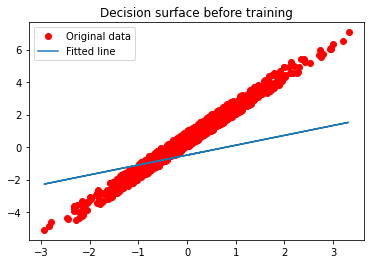

In [63]:
# synthetic data
plt.plot(data_input.numpy(), data_output.numpy(), 'ro', label='Original data') 
# model predictions on synthetic data
plt.plot(data_input.numpy(), model(data_input).detach().numpy(), label='Fitted line') # "detach()" returns a tensor `detached’ from the current graph. 
plt.legend()
plt.title("Decision surface before training")
plt.show()

The fitted line (based on random weights) is a poor fit to the underlying data.

### Training procedure


The skeleton of the training procedure is:

In [64]:
'''
for epoch in 1 to MAX_EPOCHS:
   for batch in batches(data): 
      1. forward propagation - pass the batch through the model
      2. backward propagation - compute the gradients w.r.t each model parameter and update the model
'''

'\nfor epoch in 1 to MAX_EPOCHS:\n   for batch in batches(data): \n      1. forward propagation - pass the batch through the model\n      2. backward propagation - compute the gradients w.r.t each model parameter and update the model\n'

The full training procedure is:

In [65]:
# placeholders for current batch
batch_input = torch.randn(BATCH_SIZE, 1, requires_grad=False)
batch_output = torch.randn(BATCH_SIZE, 1, requires_grad=False)
num_batches = NUM_EXAMPLES // BATCH_SIZE # number of batches per epoch

# kick-start the training
for epoch in range(MAX_EPOCHS):
  # create a random indices from 1 to NUM_EXAMPLES
  rand_indices = np.random.permutation(NUM_EXAMPLES)
  total_loss = 0.0
  for batch in range(num_batches):
    # load the current batch
    for bi in range(BATCH_SIZE):
      cur_index = rand_indices[batch*BATCH_SIZE + bi]
      batch_input[bi] = data_input[cur_index]
      batch_output[bi] = data_output[cur_index]
    
    # forward propagation
    # pass the data through the model
    model_outputs = model(batch_input)
    # compute the loss
    cur_loss = criterion(model_outputs, batch_output)
    total_loss += cur_loss.item()
    
    # backward propagation (compute the gradients and update the model)
    # compute the gradients
    cur_loss.backward()
    # update the weights
    model.weight.data = model.weight.data - (1.0/BATCH_SIZE) * LEARNING_RATE * model.weight.grad
    model.bias.data = model.bias.data - (1.0/BATCH_SIZE) * LEARNING_RATE * model.bias.grad
    # clear the buffer
    model.weight.grad.zero_()
    model.bias.grad.zero_()
  # print the loss for every epoch
  print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, MAX_EPOCHS, total_loss/num_batches))
    


Epoch [1/5], Loss: 0.2773
Epoch [2/5], Loss: 0.0830
Epoch [3/5], Loss: 0.0835
Epoch [4/5], Loss: 0.0833
Epoch [5/5], Loss: 0.0836


### Plot the decision surface after training


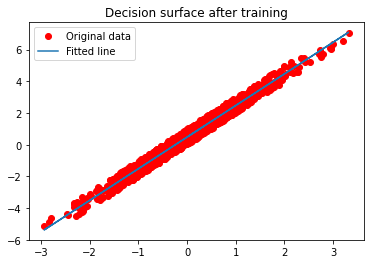

In [66]:
plt.plot(data_input.numpy(), data_output.numpy(), 'ro', label='Original data') # synthetic data
plt.plot(data_input.numpy(), model(data_input).detach().numpy(), label='Fitted line') # model predictions on synthetic data
plt.legend()
plt.title("Decision surface after training")
plt.show()

The fitted line (based on learned weights) seems to be a better fit to the underlying data.

Now that we have built our first PyTorch model and the training pipeline, we can look into modules in PyTorch which can help us write efficient deep learning code.

## Miscellaneous PyTorch modules

### DataLoader
PyTorch's DataLoader ``torch.utils.data.DataLoader`` brings in several desirable advantages:
- automatic batching (e.g., we managed the batches explicitly in our linear regression code which can be avoided)
- multi-process data loading
- customizing data loading order
- automatic memory pinning and so on.

Let us implement a simple dataloader for our linear regression problem:

In [67]:
from torch.utils.data import Dataset, DataLoader

# create a new class inheriting torch.utils.data.Dataset
class LRDataset(Dataset):
  """ LR Synthetic dataset."""
  # prepare synthetic training examples, 1000 of them each having 1 feature
  def __init__(self, n):
    self.n = n
    self.data_input = torch.randn(n, 1, requires_grad=False)
    self.data_output = torch.randn(n, 1, requires_grad=False)
    for xi in range(n):
      # make output some arbitrary function of x
      self.data_output[xi] = self.data_input[xi].item()*2 + random.random() 
  
  # return input and output of a single example
  def __getitem__(self, index):
    return self.data_input[index], self.data_output[index]
  
  # return the total number of examples
  def __len__(self):
    return self.n

# create the dataloader object
dataset = LRDataset(NUM_EXAMPLES)
train_loader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2) 
# num_workers refers to no. of subprocesses to use
# for more details, look at https://pytorch.org/docs/stable/data.html#

# iterate over the dataset for one epoch
num_batches = 0
for i, data in enumerate(train_loader, 0):
  input, output = data
  if i == 0:
    print(input.size(), output.size())
  num_batches += 1
print(num_batches) # prints the number of batches per epoch
    

torch.Size([5, 1]) torch.Size([5, 1])
200


### Defining a custom model class

Wrapping the specifics of a model to a class will help us in extending our model swiftly. This is especially useful if our custom model has a lot of layers. We can define a custom model class by inheriting ``torch.nn.Module`` to wrap all the layers in our model as well as the forward propagation logic. 

Let us implement a custom model for our linear regression problem:

In [68]:
# create a custom model class inheriting torch.nn.Module
class LRmodel(nn.Module):
  
  def __init__(self):
    # In the constructor we define the layers for our model
    super(LRmodel, self).__init__()
    self.linear_layer = nn.Linear(1, 1)
  
  def forward(self, x):
    # In the forward function we define the forward propagation logic
    out = self.linear_layer(x)
    return out

# instantiate an object from the model
model = LRmodel()

# create sample input
input = torch.randn(100, 1)

# pass the data through the model
out = model(input)

# print the size of the input and output
print(input.size(), out.size())

torch.Size([100, 1]) torch.Size([100, 1])


### PyTorch's optim package

``torch.optim`` is a PyTorch package implementing various optimization algorithms like SGD, Rmsprop and Adam. 

Let us implement the mini-batch GD algorithm using optim:

In [69]:
# create an instance of SGD with required hyperparameters
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
criterion = nn.MSELoss()

# print weights before update
for param in model.parameters():
  print(param.data)

# create sample input and output
input = torch.randn(100, 1)
output = torch.randn(100, 1)

# forward pass
prediction = model(input)
loss = criterion(prediction, output)
# backward pass
optimizer.zero_grad() # clears the gradient buffer
loss.backward() # performs the backward pass
optimizer.step() # update the weights

# print weights before update
for param in model.parameters():
  print(param.data)

tensor([[0.9431]])
tensor([-0.6068])
tensor([[0.7650]])
tensor([-0.4840])


You can look for other available optimization algorithms here: https://pytorch.org/docs/stable/optim.html

## Adding dataloader, custom model and optim to our linear regression code

In this section we will refine our linear regression code with the previously discussed modules, specifically DataLoader, custom model and optim.

The self-contained full code is as below:

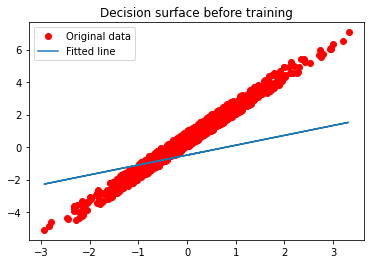

Epoch [1/5], Loss: 0.1291
Epoch [2/5], Loss: 0.0847
Epoch [3/5], Loss: 0.0870
Epoch [4/5], Loss: 0.0863
Epoch [5/5], Loss: 0.0867


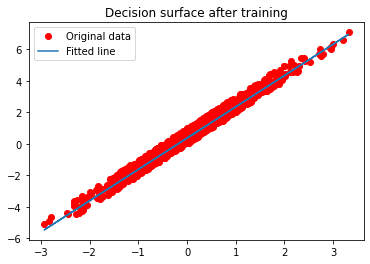

In [70]:
# all the necessary imports
import random
import matplotlib.pyplot as plt
import math
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from torch import optim
import numpy as np

# set the seed
manual_seed = 123
random.seed(manual_seed)
np.random.seed(manual_seed)
torch.manual_seed(manual_seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
if n_gpu > 0:
  torch.cuda.manual_seed(manual_seed)

"""
create a new class inheriting torch.utils.data.Dataset
"""
class LRDataset(Dataset):
  """ LR Synthetic dataset."""
  # prepare synthetic training examples, 1000 of them each having 1 feature
  def __init__(self, n):
    self.n = n
    self.data_input = torch.randn(n, 1, requires_grad=False, device=device)
    self.data_output = torch.randn(n, 1, requires_grad=False, device=device)
    for xi in range(n):
      # make output some arbitrary function of x
      self.data_output[xi] = self.data_input[xi].item()*2 + random.random() 
  
  # return input and output of a single example
  def __getitem__(self, index):
    return self.data_input[index], self.data_output[index]
  
  # return the total number of examples
  def __len__(self):
    return self.n

"""
create a custom model class inheriting torch.nn.Module
"""
class LRmodel(nn.Module):
  
  def __init__(self):
    # In the constructor we define the layers for our model
    super(LRmodel, self).__init__()
    self.linear_layer = nn.Linear(1, 1)
  
  def forward(self, x):
    # In the forward function we define the forward propagation logic
    out = self.linear_layer(x)
    return out

# hyperparameters
MAX_EPOCHS = 5
LEARNING_RATE = 0.1
BATCH_SIZE = 5
NUM_EXAMPLES = 1000

# create the dataloader instance
dataset = LRDataset(NUM_EXAMPLES)
train_loader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2) 

# define the model
model = LRmodel()
model.to(device)
criterion = nn.MSELoss()

# create an instance of SGD with required hyperparameters
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# print the decision surface before training
plt.plot(dataset.data_input.numpy(), dataset.data_output.numpy(), 'ro', label='Original data') # synthetic data
plt.plot(dataset.data_input.numpy(), model(dataset.data_input).detach().numpy(), label='Fitted line') # model predictions on synthetic data
plt.legend()
plt.title("Decision surface before training")
plt.show()

# start the training
num_batches = NUM_EXAMPLES // BATCH_SIZE # number of batches per epoch
for epoch in range(MAX_EPOCHS):
  total_loss = 0.0
  # iterate throught the data loader
  for batch in train_loader:
    # load the current batch
    batch_input, batch_output = batch
    
    # forward propagation
    # pass the data through the model
    model_outputs = model(batch_input)
    # compute the loss
    cur_loss = criterion(model_outputs, batch_output)
    total_loss += cur_loss.item()
    
    # backward propagation (compute the gradients and update the model)
    # clear the buffer
    optimizer.zero_grad()
    # compute the gradients
    cur_loss.backward()
    # update the weights
    optimizer.step()
    
  # print the loss for every epoch
  print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, MAX_EPOCHS, total_loss/num_batches))

# print the decision surface after training
plt.plot(dataset.data_input.numpy(), dataset.data_output.numpy(), 'ro', label='Original data') # synthetic data
plt.plot(dataset.data_input.numpy(), model(dataset.data_input).detach().numpy(), label='Fitted line') # model predictions on synthetic data
plt.legend()
plt.title("Decision surface after training")
plt.show()

That's it!